# Fanal

## A neutrino-less beta decay search 

## An open exercise


## Signal selection 


### USC, Master de Física, Física de Partícula II


J. A. Hernando-Morata, 
with the help of J. Muñoz, J. M. Benlloch, B. Palmeiro, G. Díaz.

February 2021


In [28]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Importing modules

In [29]:
import numpy  as np
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt

import scipy.constants as constants

import warnings
warnings.filterwarnings('ignore')

In [30]:
# REMEMBER TO ADD THE FOLDER TO PYTHONPATH
import os
import sys
dirpath = os.getcwd()[:-9]
print('add path to PYTHONPATH : ', dirpath)
sys.path.insert(0, os.path.abspath(dirpath))

add path to PYTHONPATH :  /Users/hernando/docencia/master/Fisica_Particulas/USC-Fanal


In [31]:
import core.pltext as pltext  # extensions for plotting histograms
import core.hfit   as hfit    # extension to fit histograms
import core.utils  as ut      # generic utilities

import ana.fanal  as fn

pltext.style()

## Indications

### Objectice

**Define** a selection or **an analysis strategy** to better identify bb0nu events and discard background events using simulated data.

### Tasks:

   * open the data file (HDF) and access the simulation data (MC) for the main backgrounds: 214Bi and 208Tl, and the bb0nu signal.

   * Inspect the variables. Identify the most powerful variables.
   
   * Replicate the 'fanal' analysis (see bellow).

   * Define a selection (a list of cuts) and compare it with the 'fanal' analysis.
   
      * You can also try a Multi-Variate methods, but it is not necessary.
      
   * Estimate the energy resolution using the Qbb peak.
   
 ### Notes:
 
 
   * The variable 'mcE' is the true energy, it is not measurable, and therefore can not be used in any analysis!
   
   * The rest of the varaibles are the 'measurable' quantities and can be used in the analysis.

## Access the data

In [43]:
#dirpath = '/Users/hernando/docencia/master/Fisica_Particulas/USC-Fanal/data/'

In [71]:
filename = '/data/alpha.h5'
print('Data path and filename : ', dirpath + filename)

mcbi = pd.read_hdf(dirpath + filename, key = 'mc/bi214')
mctl = pd.read_hdf(dirpath + filename, key = 'mc/tl208')
mcbb = pd.read_hdf(dirpath + filename, key = 'mc/bb0nu')

Data path and filename :  /Users/hernando/docencia/master/Fisica_Particulas/USC-Fanal/data/eta.h5


## inspect the variables



In [72]:
mcbb

,mcE,E,num_tracks,num_voxels,track0_E,track0_voxels,track0_length,blob1_E,blob2_E,track1_E,track1_voxels,track1_length,zave,rmax
58064,2.45783,2.463658,1.0,19,2.455529,19.0,82.786688,0.694205,0.700785,NaN,NaN,NaN,741.509003,405.878249
45564,2.45783,2.454267,2.0,28,2.314978,26.0,109.125286,0.897594,0.730589,0.128555,2.0,8.908604,442.353241,329.705034
52263,2.45783,2.455571,3.0,22,2.339158,20.0,94.493564,0.833459,0.944533,0.105628,1.0,0.000000,535.282364,349.667895
14437,2.45783,2.443638,1.0,18,2.448726,18.0,49.775724,0.827164,0.769303,NaN,NaN,NaN,974.760071,475.891578
41803,2.45783,2.461795,1.0,20,2.464121,20.0,51.446132,0.677789,0.555296,NaN,NaN,NaN,242.173264,434.050524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45469,2.45783,2.470078,1.0,15,2.478416,15.0,50.043463,1.472343,0.877343,NaN,NaN,NaN,845.861481,343.701385
10477,2.45783,2.461756,2.0,26,2.357931,24.0,49.873100,0.838265,0.841093,0.088143,2.0,12.965617,1075.202637,304.544719
40947,2.45783,2.473944,1.0,20,2.472718,20.0,82.402359,1.018284,0.669637,NaN,NaN,NaN,760.396149,407.829090
22819,2.45783,2.470945,1.0,19,2.478933,19.0,92.252343,1.047926,0.560934,NaN,NaN,NaN,407.425735,210.415033


### Histogram the variables

We are drawing the variables only in the relevant range (2.6, 2.7 MeV)

In [73]:
mcs  = [mcbb, mcbi, mctl] # list of the mc DFs
ssamples = [r'$\beta\beta0\nu$', r'$^{214}$Bi', r'$^{208}$Tl'] # str names of the mc samples

In [74]:
# Draw all the variables of the data-frames for the mc samples
def selection(df, varname, varrange):
    """ apply the selection df.varname in a range, varange
    inputs:
        df       : dataFrame
        varname  : str, name of the variable int he DF
        varrange : tuple(float, float), range of the selection, all (-np.inf, np.inf)
    returns:
        sel      : np.array(bool) same same of DF with True/False
                   if the item fulfull variable value (varname) inside the range (varrange)
    """
    sel = (df[varname] >= varrange[0]) & (df[varname] < varrange[1])
    return sel



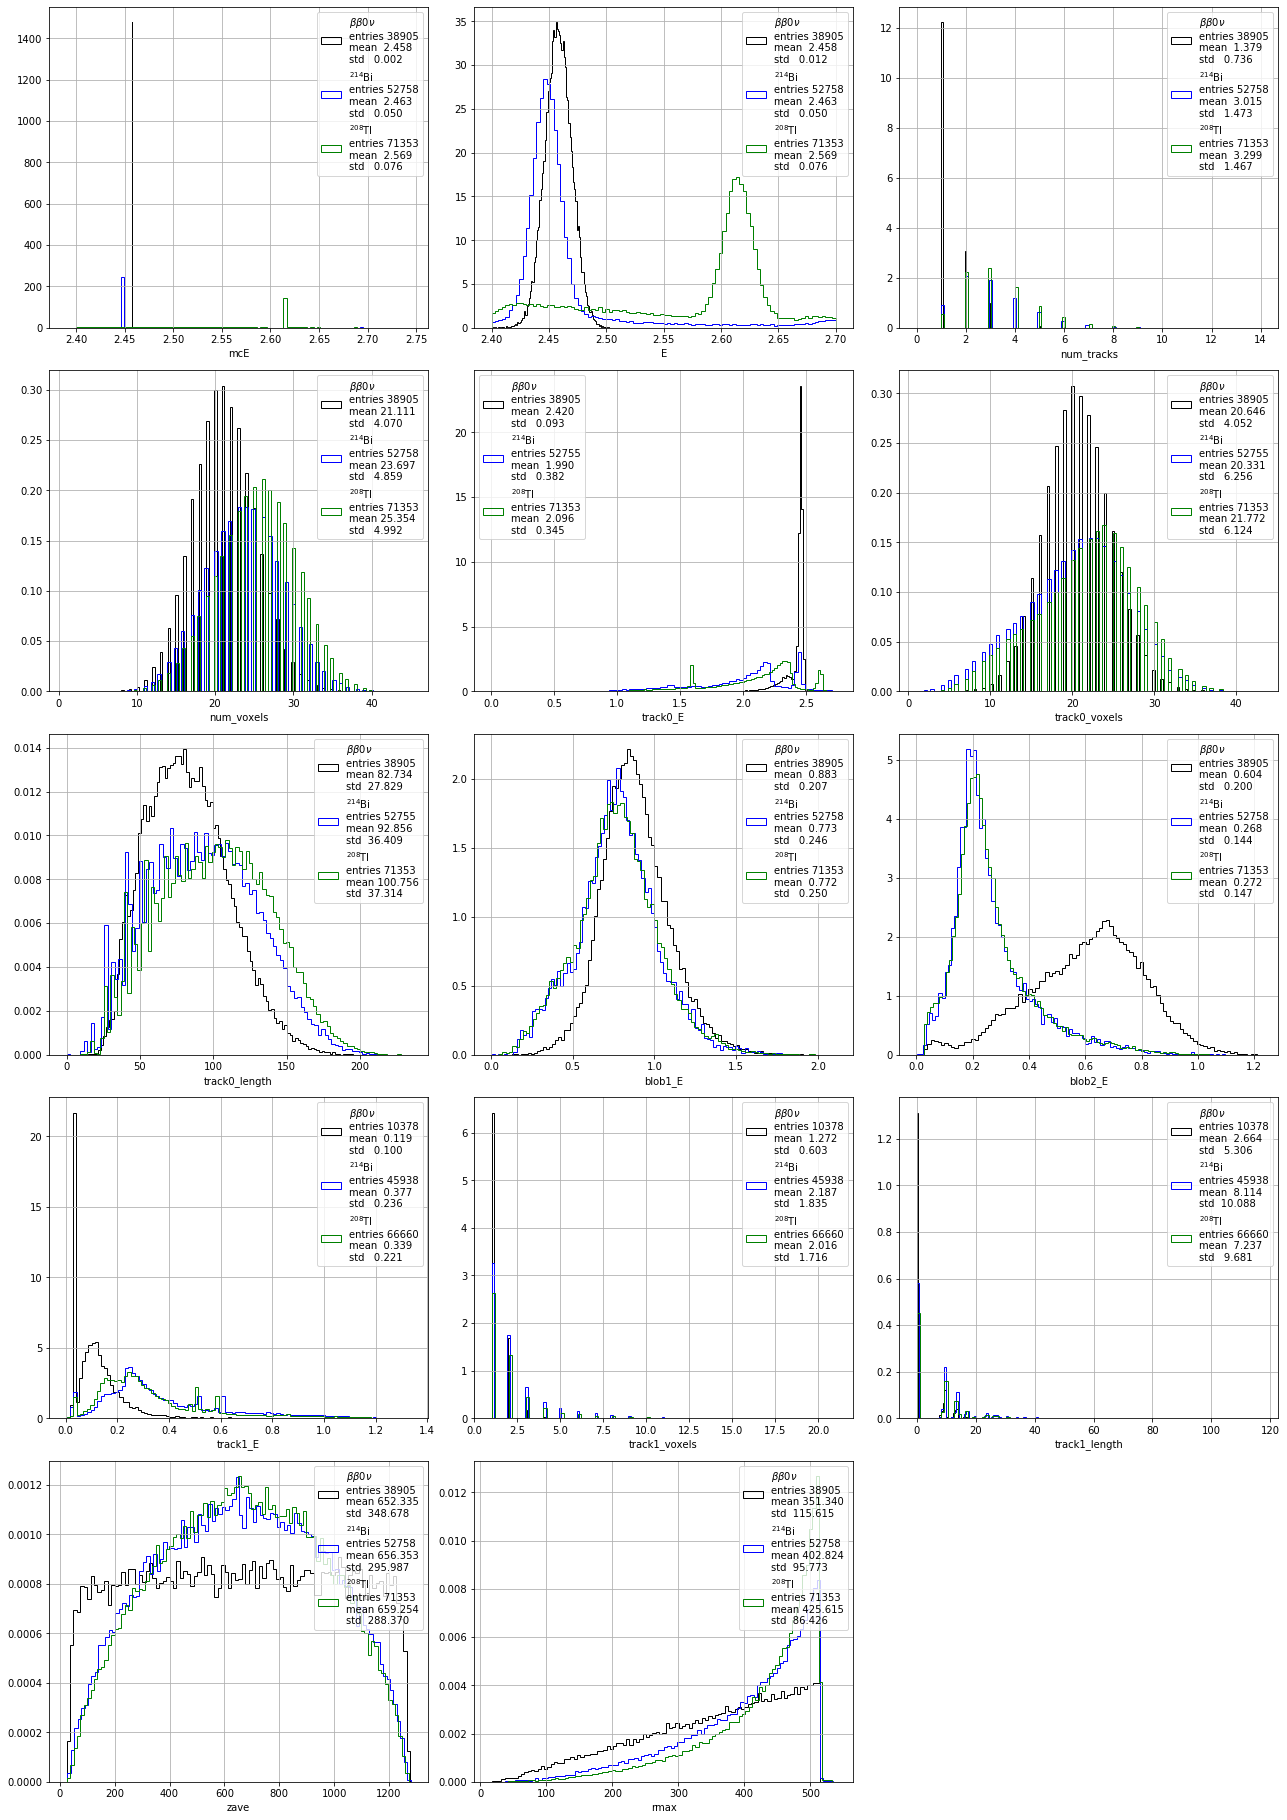

In [75]:
ename = 'E'
erange = (2.4, 2.7)       # energy range 
# filter the MC DF only consider events with energy in the energy-range
mcs  = [mc[selection(mc, ename, erange)] for mc in mcs]

# plot the distribution of all the variables
pltext.dfs_inspect(mcs, dfnames = ssamples, ncolumns = 3)

## Fanal analysis

The analysis is based in selecting a very pure sample of bb0nu. It applies a list of cuts. 

The experiment can be then consider either as a counting experiment (estimate the number of bkg events in the RoI and compare it with the number of observed events)

The 'fanal' selection has the following cuts:

   * Energy of the event is on the (2.4, 2.65) MeV range.
   
   * One reconstructed track. Most of the signal has only 1 track, while the background has in general more than one.
   
   * Second blob energy (the less energetic blob of the track) must have at least 400 keV. The signal has a real blob while the sedond blob of background must be in general the initial part of the electron track and should have smaller energy.
   
   * Region of Interest (RoI). The relevant gaussian region where the bb0nu is. In this example (2.44, 2.475) MeV
   

### Plot the analysis variables 

Plot the variables of the analysis for the different MC samples.

In [76]:
def plt_fanal_mc(mcs, ssamples, bins = 100, erange = (2.4, 2.65), eroi = (2.44, 2.475)):
    """ Plot the relevant analysis variables, for the different mc samples
    """

    subplot = pltext.canvas(5)

    subplot(1)
    for i, mc in enumerate(mcs):
        sel = (mc.E >= erange[0]) & (mc.E < erange[1])
        # sel = ut.in_range(mc.E, erange) equivalent using in_range method of utils
        pltext.hist(mc.E[sel], 100, label = ssamples[i], density = True)
        plt.xlabel('Energy (MeV)'); plt.title('E range');
    
    subplot(2)
    for i, mc in enumerate(mcs):
        sel  = ut.in_range(mc.E, erange)
        pltext.hist(mc.num_tracks[sel], 50, label = ssamples[i], density = True, range = (0, 15))
        plt.xlabel('number of tracks'); plt.title('E range')

    subplot(3)
    for i, mc in enumerate(mcs):
        sel  = ut.in_range(mc.E, erange) & mc.num_tracks == 1
        pltext.hist(mc.blob2_E[sel], 100,  label = ssamples[i], density = True)
        plt.xlabel('Energy blob2 (MeV)'); plt.title('E range - 1 track')

    subplot(4)
    for i, mc in enumerate(mcs):
        sel  = (ut.in_range(mc.E, erange)) & (mc.num_tracks == 1) & (mc.blob2_E >= 0.4)
        pltext.hist(mc.E[sel], 100,  label = ssamples[i], density = True)
        plt.xlabel('Energy (MeV)'); plt.title('E range - 1 track - blob2 cut')  
        
    subplot(5)
    for i, mc in enumerate(mcs):
        sel  = (ut.in_range(mc.E, eroi)) & (mc.num_tracks == 1) & (mc.blob2_E >= 0.4)
        pltext.hist(mc.E[sel], 100,  label = ssamples[i], density = True)
        plt.xlabel('Energy  (MeV)'); plt.title('E RoI - 1 track - blob2 cut') 
    
    plt.tight_layout();
    return

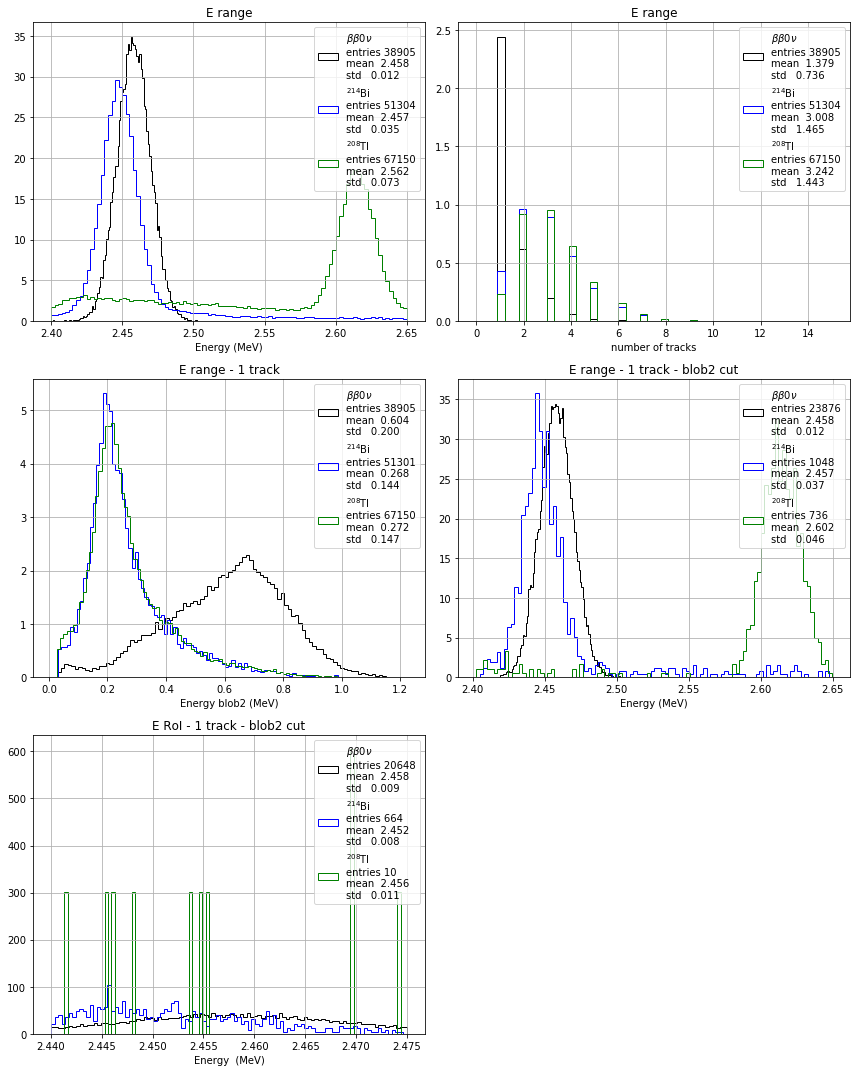

In [77]:
plt_fanal_mc(mcs, ssamples)

## Efficiencies

Compute and plot the efficiencies of the cuts: 

  * Energy in (2.4, 2.7) MeV
  
  * One track
  
  * Second blob Energy > 400 keV
  
  * Fine RoI (2.440, 2.475)

In [78]:
erange     = (2.400, 2.650)
eroi       = (2.440, 2.475)
selnames  = ['E', 'num_tracks', 'blob2_E', 'E']
selranges = [erange, (1., 1.1), (0.4, np.inf), eroi]

In [79]:
def selections(df, varnames, varranges):
    """ appy a list of selections in order in a data-frame
    inputs:
        df        : DataFrame
        varnames  : tuple(str), list of the variables of the selections
        varranges : tuple(float, float), range of the variables in the selection
    returns:
        sels: tuple(np.array(bool)), tuple with the selections applied in series
    """
    sel, sels =  None, []
    for i, varname in enumerate(varnames):
        isel = selection(df, varname, varranges[i])
        sel  = isel if sel is None else sel & isel
        sels.append(sel)
    return sels

def efficiency(sel, n = None):
    """ compute the efficiency and uncertanty of a selection
    inputs:
        sel: np.array(bool), bool array with True/False
        n  : int, denominator, if n is None, use len(sel)
    returns:
        eff : float, efficiency
        ueff: float, efficiency uncertainty
    """
    n    = n if n is not None else len(sel)
    eff  = np.sum(sel)/n
    ueff = np.sqrt(eff * (1- eff) / n)
    return eff, ueff

$\beta\beta0\nu$ :  E 1.00000 num_tracks 0.73325 blob2_E 0.61370 RoI 0.53073
$^{214}$Bi :  E 0.97244 num_tracks 0.12519 blob2_E 0.01986 RoI 0.01259
$^{208}$Tl :  E 0.94110 num_tracks 0.06563 blob2_E 0.01031 RoI 0.00014


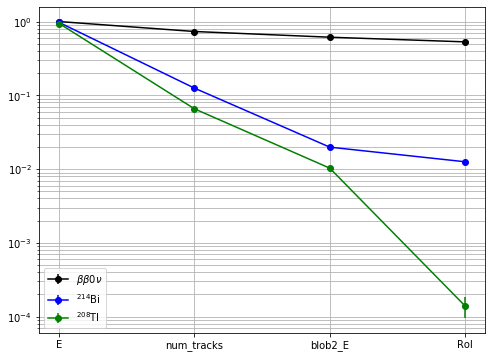

In [80]:
erange    = (2.400, 2.650)
eroi      = (2.440, 2.475)
varnames  = ['E', 'num_tracks', 'blob2_E', 'E']
varranges = [erange, (1., 1.1), (0.4, np.inf), eroi]
selnames  = ['E', 'num_tracks', 'blob2_E', 'RoI']

subplot = pltext.canvas(1, 1, 6, 8)
subplot(1)
for i, mc in enumerate(mcs):
    sels = selections(mc, varnames, varranges)
    effs = [efficiency(sel) for sel in sels]
    veff = [eff[0] for eff in effs] # efficiencies values
    ueff = [eff[1] for eff in effs] # efficiencies uncertainties
    print(ssamples[i], ': ', *['{:s} {:6.5f}'.format(s, eff) for s, eff in zip(selnames, veff)])
    plt.errorbar(selnames, veff, yerr = ueff, marker = 'o', label = ssamples[i])
plt.grid(which = 'both'); plt.yscale('log'); plt.legend();

## Estimate the energy resolution 

The energy resolution is a crucial parameters in this analysis.

Fit the energy distribution of the photo-peaks of Bi214, Tl208 and the bb0nu Qbb.

You can fit to a gaussian distribution or to a gaussian on top of a pedestal modeled with a straight line.

You can give the relative energy resolution as the sigma/E or FWHM/E.

Energy resolution:   0.50 % FWHM at Qbb


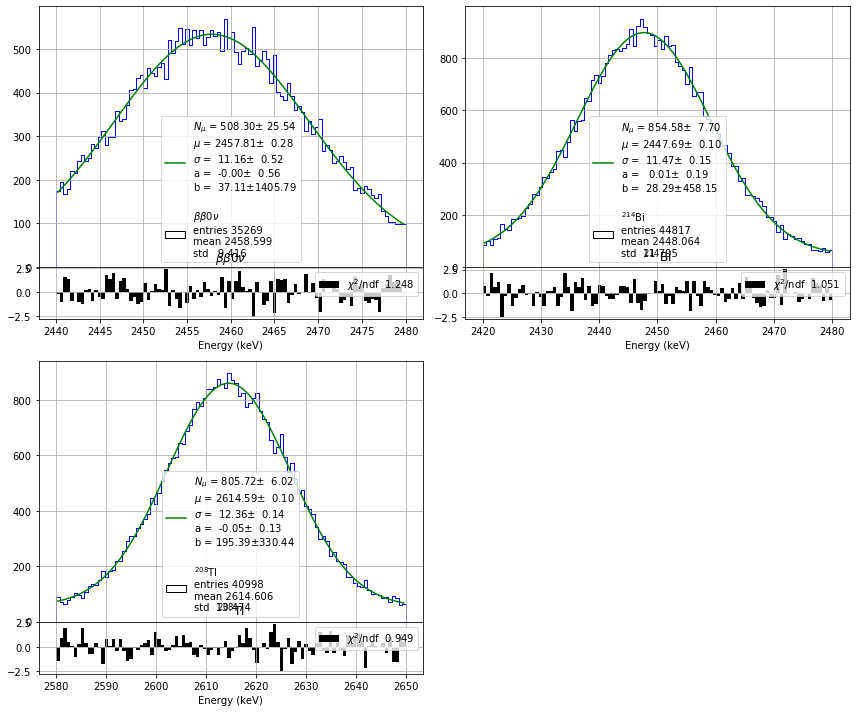

In [81]:
eranges = ((2440, 2480), (2420., 2480.), (2580, 2650))
fitfuns = ('gausline', 'gausline', 'gausline')
guesses =((50e3, 2458., 20., 0., 0.), (10e3, 2445., 20., 0., 300.), (50e3, 2615., 20., 0., 1.))

subplot = pltext.canvas(4)

for i, mc in enumerate(mcs):
    subplot(i + 1)
    pltext.hist(1e3 * mc.E, 100, range = eranges[i], label = ssamples[i]);
    pltext.hfitres(1e3 * mc.E, 100, range = eranges[i], fun = fitfuns[i], guess = guesses[i])
    plt.xlabel('Energy (keV)'); plt.title(ssamples[i])
plt.tight_layout();

print('Energy resolution: {:6.2f} % FWHM at Qbb'.format(100. * 5.25 * 2.35 / 2457.8))